In [38]:
import matplotlib.pyplot as plt
import pandas as pd 
import spotipy 
import librosa
import librosa.display
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials 


# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido
import librosa
import librosa.display
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 

from scipy.signal import savgol_filter

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

#sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
df_int = pd.read_pickle('../sources/dataset_integrado.pickle')
genre_real = df_int['genre']
df_int = df_int.drop([
    'disc_number',
    'duration_ms',
    'popularity',
    'track_number',
],1)

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_int.select_dtypes(include=numerics)

#newdf = newdf.iloc[:,0:12]

newdf.head(3).T.head(20)

id,4d3XHYFFuYYzxWr2cJ6yQl,3X3p3u03P8eFL8WTH0oaaU,4KlXeaheot0OI9PoOWspvZ
danceability,0.48700,0.615000,0.79200
energy,0.14500,0.204000,0.30100
key,5.00000,7.000000,9.00000
loudness,-18.67000,-16.075000,-9.92500
mode,1.00000,1.000000,0.00000
speechiness,0.05220,0.043900,0.04090
acousticness,0.87600,0.872000,0.54600
instrumentalness,0.82200,0.382000,0.82100
liveness,0.14900,0.071000,0.07700
valence,0.14200,0.496000,0.42400


In [16]:
from sklearn.preprocessing import quantile_transform

data = pd.DataFrame(
    quantile_transform(
        newdf, 
        output_distribution = 'normal', 
        random_state = 0, 
        copy = True
    ),
    columns=newdf.columns,
    index=newdf.index
)
data.head(3).T.head(15)

id,4d3XHYFFuYYzxWr2cJ6yQl,3X3p3u03P8eFL8WTH0oaaU,4KlXeaheot0OI9PoOWspvZ
danceability,0.165095,0.875354,1.968872
energy,-0.930036,-0.711981,-0.466803
key,-0.045180,0.360172,0.892038
loudness,-0.919089,-0.676789,-0.046436
mode,5.199338,5.199338,-5.199338
speechiness,0.252311,-0.177827,-0.396560
acousticness,0.590949,0.579039,0.208091
instrumentalness,0.639462,0.124523,0.636387
liveness,0.271787,-1.286702,-1.121381
valence,-0.492137,0.597790,0.441748


In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, genre_real,
                                                    test_size=0.3, stratify=genre_real,
                                                    random_state= 324) # 70% training and 30% test


In [59]:
np.linspace(start = 500, stop = 1000, num = 5)

array([ 500.,  625.,  750.,  875., 1000.])

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 60, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'ccp_alpha':[0.0,0.001,0.005]}

pprint(random_grid)

forest = RandomForestClassifier(n_jobs=-1)

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid,
                               n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)


{'ccp_alpha': [0.0, 0.001, 0.005],
 'max_depth': [20, 30, 40, 50, 60],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [500, 625, 750, 875, 1000]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.1min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [61]:
rf_random.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 20,
 'ccp_alpha': 0.0}

In [65]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(data.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
dfeature = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(dfeature['importance'])
feature= list(dfeature['feature'])

#see df
dfeature.to_pickle("../sources/importance.pickle")
dfeature.head(10)

,importance,feature
0,0.038237,acousticness
1,0.034730,instrumentalness
2,0.033676,t05_50
3,0.033638,tempo
4,0.033351,t05_25
5,0.030591,t05_75
6,0.027420,t04_75
7,0.026193,t03_75
8,0.023671,t02_75
9,0.023250,loudness_max_25


No handles with labels found to put in legend.


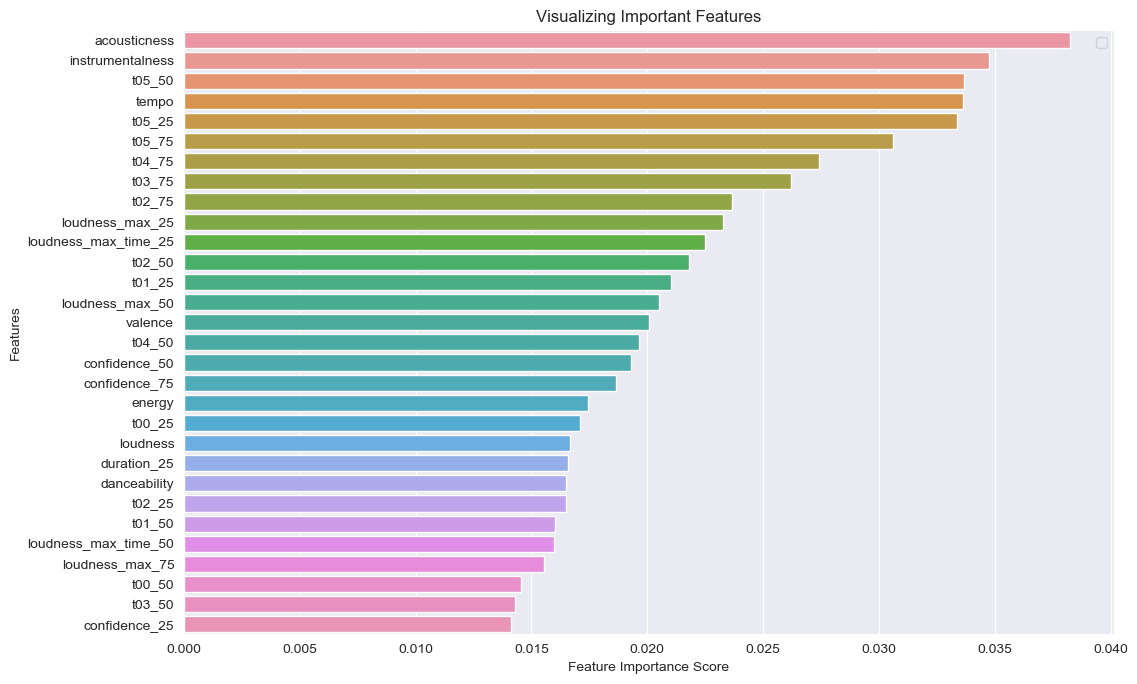

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
# Creating a bar plot
sns.barplot(x=importance[0:30], y=feature[0:30])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [18]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8481632653061224


In [20]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=data.columns).sort_values(ascending=False)
feature_imp

acousticness        0.033135
instrumentalness    0.032132
t05_50              0.031800
tempo               0.030707
t05_25              0.030443
                      ...   
mode                0.000843
time_signature      0.000584
loudness_end_50     0.000000
loudness_end_75     0.000000
loudness_end_25     0.000000
Length: 102, dtype: float64

No handles with labels found to put in legend.


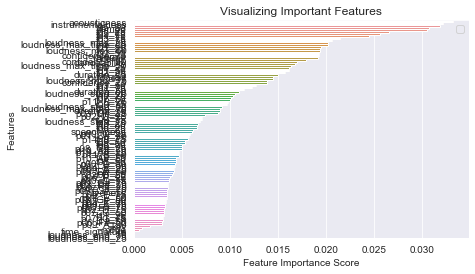

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
